## Part 1

First 5 rows:
             Y            X      Scale       Angle  Response  Feature_1  \
0  1080.289917  1871.340576   2.650851  265.588531  0.108878      133.0   
1   992.686340  1960.387939   2.606995  353.797394  0.077875       30.0   
2  1958.299438  2614.439209  17.619907  261.920410  0.076401        2.0   
3  1485.067261  1269.294067   2.251461  267.496582  0.086173      129.0   
4  1375.478271  2610.739746   2.060762  218.360001  0.080922       70.0   

   Feature_2  Feature_3  Feature_4  Feature_5  ...  Feature_119  Feature_120  \
0       26.0        0.0        1.0        1.0  ...         28.0         25.0   
1       23.0       31.0        1.0        0.0  ...         71.0         84.0   
2        1.0        5.0       10.0        5.0  ...         28.0         61.0   
3       42.0        3.0       13.0       24.0  ...          9.0         41.0   
4      131.0        8.0       11.0        7.0  ...          6.0         13.0   

   Feature_121  Feature_122  Feature_123  Feature_124 

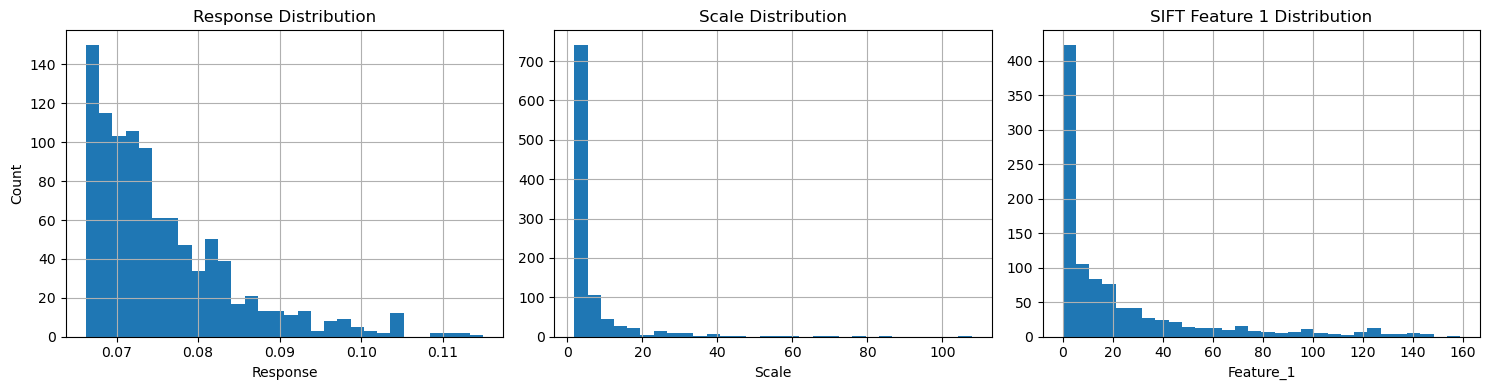

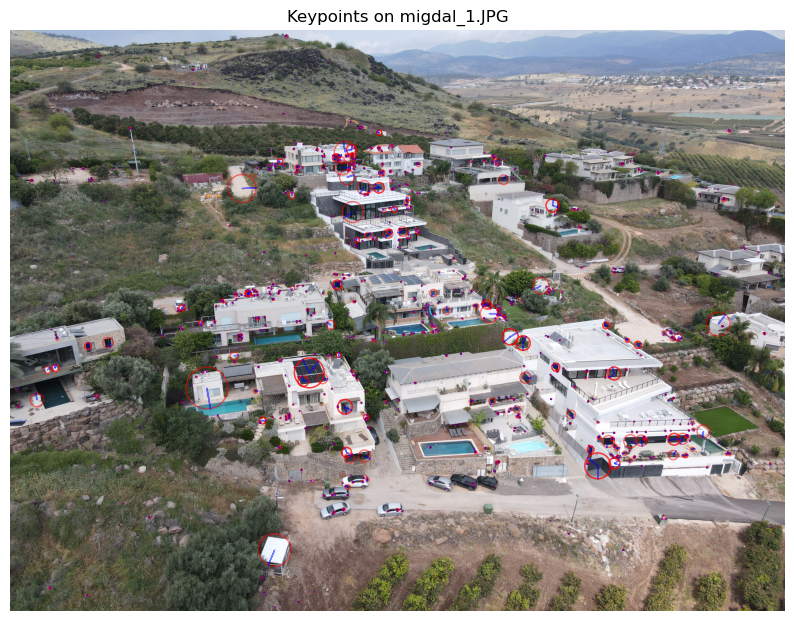

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the SIFT dataset
csv_path = 'dataset_migdal/migdal_1_sift_dataset.csv'
df = pd.read_csv(csv_path)

# 1. Print .head() and .describe()
print('First 5 rows:')
print(df.head())
print('\nSummary statistics:')
print(df.describe())

# 2. Plot histograms for Response, Scale, and a few SIFT features
plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
df['Response'].hist(bins=30)
plt.title('Response Distribution')
plt.xlabel('Response')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
df['Scale'].hist(bins=30)
plt.title('Scale Distribution')
plt.xlabel('Scale')

plt.subplot(1, 3, 3)
df['Feature_1'].hist(bins=30)
plt.title('SIFT Feature 1 Distribution')
plt.xlabel('Feature_1')
plt.tight_layout()
plt.show()

# 3. Visualize keypoints on the image
img_path = 'dataset_migdal/migdal_1.JPG'
img = np.array(Image.open(img_path))

plt.figure(figsize=(10, 8))
plt.imshow(img)

# X, Y as position, Scale as radius, Angle as direction
x = df['X']
y = df['Y']
scale = df['Scale']
angle = df['Angle']

# Plot keypoints as circles
for i in range(len(df)):
    circ = plt.Circle((x[i], y[i]), scale[i], color='r', fill=False, alpha=0.5)
    plt.gca().add_patch(circ)
    # Draw direction arrow
    dx = np.cos(angle[i]) * scale[i]
    dy = np.sin(angle[i]) * scale[i]
    plt.arrow(x[i], y[i], dx, dy, color='b', head_width=2, head_length=2, alpha=0.5)

plt.title('Keypoints on migdal_1.JPG')
plt.axis('off')
plt.show()